# Titanic Survival Prediction: An End-to-End Machine Learning Project

## Introduction
This Jupyter notebook aims to guide you through an end-to-end machine learning project using the Titanic dataset from Kaggle. The goal is to predict whether a passenger survived the Titanic disaster.

## 1. Data Loading
The first step in any machine learning project is loading the data. We will load our dataset using pandas.

In [95]:
import pandas as pd
import seaborn as sns

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Data Cleaning and Preprocessing
Data cleaning is crucial for the success of any model. We'll handle missing values, remove unnecessary columns, and convert categorical data to numerical data.

In [96]:
titanic_data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [97]:
titanic_data['age']         = titanic_data['age'].fillna(titanic_data['age'].mode()[0])
titanic_data['embarked']    = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])
titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])
titanic_data['deck']        = titanic_data['deck'].fillna(titanic_data['deck'].mode()[0])

## 3. Feature Engineering

In [98]:
titanic_data['familySize'] = titanic_data['sibsp'] + titanic_data['parch'] + 1


del titanic_data['sibsp']
del titanic_data['parch']
del titanic_data['alive']

titanic_data

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alone,familySize
0,0,3,male,22.0,7.2500,S,Third,man,True,C,Southampton,False,2
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,False,2
2,1,3,female,26.0,7.9250,S,Third,woman,False,C,Southampton,True,1
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,False,2
4,0,3,male,35.0,8.0500,S,Third,man,True,C,Southampton,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Second,man,True,C,Southampton,True,1
887,1,1,female,19.0,30.0000,S,First,woman,False,B,Southampton,True,1
888,0,3,female,24.0,23.4500,S,Third,woman,False,C,Southampton,False,4
889,1,1,male,26.0,30.0000,C,First,man,True,C,Cherbourg,True,1


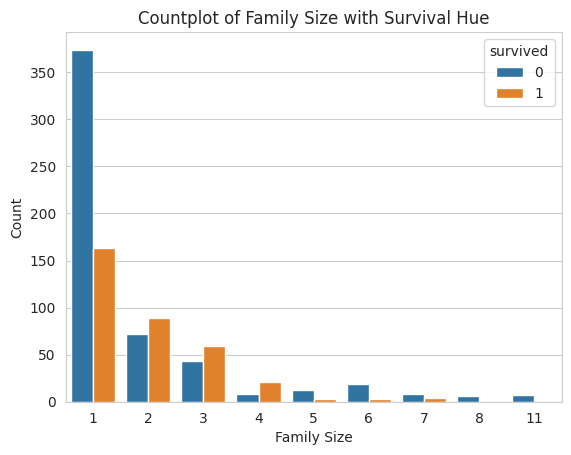

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(x='familySize', hue='survived', data=titanic_data)

# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Countplot of Family Size with Survival Hue')

# Show the plot
plt.show()

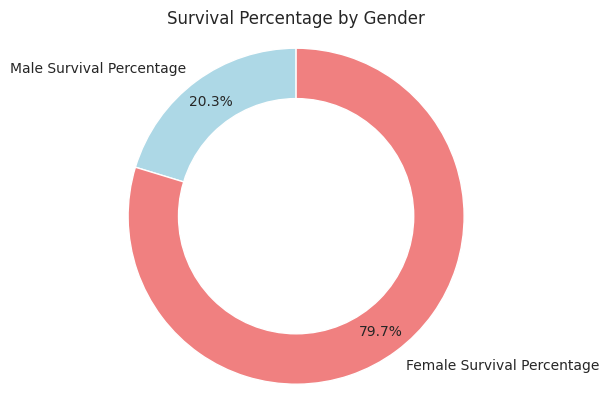

In [100]:
import matplotlib.pyplot as plt

# Survival percentages (from your provided code)
male_survival_percentage = (titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['survived'] == 1)].shape[0] / len(titanic_data[titanic_data['sex'] == 'male'])) * 100
female_survival_percentage = (titanic_data[(titanic_data['sex'] == 'female') & (titanic_data['survived'] == 1)].shape[0] / len(titanic_data[titanic_data['sex'] == 'female'])) * 100

# Data for the donut chart
labels = ['Male Survival Percentage', 'Female Survival Percentage']
sizes = [male_survival_percentage, female_survival_percentage]
colors = ['lightblue', 'lightcoral']  # Customize colors as needed

# Create the donut chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle in the center to create the donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Survival Percentage by Gender')

# Display the chart
plt.show()

In [101]:
titanic_data.head()

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alone,familySize
0,0,3,male,22.0,7.2500,S,Third,man,True,C,Southampton,False,2
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,False,2
2,1,3,female,26.0,7.9250,S,Third,woman,False,C,Southampton,True,1
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,False,2
4,0,3,male,35.0,8.0500,S,Third,man,True,C,Southampton,True,1


In [102]:
# - 1. Chancess of Survival of a person as per thrie class?
# - 2. Chancess of Survival of a kid?
# - 3. Chancess of Survival as per thr embark town?
# - 4. Relation between fare price and survival?

In [103]:
encoded_sex = pd.get_dummies(titanic_data['sex'], prefix='sex')
titanic_data = pd.concat([titanic_data, encoded_sex], axis=1)
titanic_data.drop('sex', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,embarked,class,who,adult_male,deck,embark_town,alone,familySize,sex_female,sex_male
0,0,3,22.0,7.2500,S,Third,man,True,C,Southampton,False,2,False,True
1,1,1,38.0,71.2833,C,First,woman,False,C,Cherbourg,False,2,True,False
2,1,3,26.0,7.9250,S,Third,woman,False,C,Southampton,True,1,True,False
3,1,1,35.0,53.1000,S,First,woman,False,C,Southampton,False,2,True,False
4,0,3,35.0,8.0500,S,Third,man,True,C,Southampton,True,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,S,Second,man,True,C,Southampton,True,1,False,True
887,1,1,19.0,30.0000,S,First,woman,False,B,Southampton,True,1,True,False
888,0,3,24.0,23.4500,S,Third,woman,False,C,Southampton,False,4,True,False
889,1,1,26.0,30.0000,C,First,man,True,C,Cherbourg,True,1,False,True


In [104]:
encoded_embark = pd.get_dummies(titanic_data['embarked'], prefix='embarked')
titanic_data = pd.concat([titanic_data, encoded_embark], axis=1)
titanic_data.drop(columns = 'embarked', inplace=True)

titanic_data

,survived,pclass,age,fare,class,who,adult_male,deck,embark_town,alone,familySize,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,7.2500,Third,man,True,C,Southampton,False,2,False,True,False,False,True
1,1,1,38.0,71.2833,First,woman,False,C,Cherbourg,False,2,True,False,True,False,False
2,1,3,26.0,7.9250,Third,woman,False,C,Southampton,True,1,True,False,False,False,True
3,1,1,35.0,53.1000,First,woman,False,C,Southampton,False,2,True,False,False,False,True
4,0,3,35.0,8.0500,Third,man,True,C,Southampton,True,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,Second,man,True,C,Southampton,True,1,False,True,False,False,True
887,1,1,19.0,30.0000,First,woman,False,B,Southampton,True,1,True,False,False,False,True
888,0,3,24.0,23.4500,Third,woman,False,C,Southampton,False,4,True,False,False,False,True
889,1,1,26.0,30.0000,First,man,True,C,Cherbourg,True,1,False,True,True,False,False


In [105]:
titanic_data['class'] = titanic_data['class'].map({'Third': 3, 'First': 1, 'Second': 2})

titanic_data

,survived,pclass,age,fare,class,who,adult_male,deck,embark_town,alone,familySize,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,7.2500,3,man,True,C,Southampton,False,2,False,True,False,False,True
1,1,1,38.0,71.2833,1,woman,False,C,Cherbourg,False,2,True,False,True,False,False
2,1,3,26.0,7.9250,3,woman,False,C,Southampton,True,1,True,False,False,False,True
3,1,1,35.0,53.1000,1,woman,False,C,Southampton,False,2,True,False,False,False,True
4,0,3,35.0,8.0500,3,man,True,C,Southampton,True,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,2,man,True,C,Southampton,True,1,False,True,False,False,True
887,1,1,19.0,30.0000,1,woman,False,B,Southampton,True,1,True,False,False,False,True
888,0,3,24.0,23.4500,3,woman,False,C,Southampton,False,4,True,False,False,False,True
889,1,1,26.0,30.0000,1,man,True,C,Cherbourg,True,1,False,True,True,False,False


In [106]:
encoded_who = pd.get_dummies(titanic_data['who'], prefix='who')
titanic_data = pd.concat([titanic_data, encoded_who], axis=1)
titanic_data.drop('who', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,class,adult_male,deck,embark_town,alone,familySize,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,7.2500,3,True,C,Southampton,False,2,False,True,False,False,True,False,True,False
1,1,1,38.0,71.2833,1,False,C,Cherbourg,False,2,True,False,True,False,False,False,False,True
2,1,3,26.0,7.9250,3,False,C,Southampton,True,1,True,False,False,False,True,False,False,True
3,1,1,35.0,53.1000,1,False,C,Southampton,False,2,True,False,False,False,True,False,False,True
4,0,3,35.0,8.0500,3,True,C,Southampton,True,1,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,2,True,C,Southampton,True,1,False,True,False,False,True,False,True,False
887,1,1,19.0,30.0000,1,False,B,Southampton,True,1,True,False,False,False,True,False,False,True
888,0,3,24.0,23.4500,3,False,C,Southampton,False,4,True,False,False,False,True,False,False,True
889,1,1,26.0,30.0000,1,True,C,Cherbourg,True,1,False,True,True,False,False,False,True,False


In [107]:
encoded_deck = pd.get_dummies(titanic_data['deck'], prefix='deck')
titanic_data = pd.concat([titanic_data, encoded_deck], axis=1)
titanic_data.drop('deck', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,class,adult_male,embark_town,alone,familySize,sex_female,...,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,22.0,7.2500,3,True,Southampton,False,2,False,...,False,True,False,False,False,True,False,False,False,False
1,1,1,38.0,71.2833,1,False,Cherbourg,False,2,True,...,False,False,True,False,False,True,False,False,False,False
2,1,3,26.0,7.9250,3,False,Southampton,True,1,True,...,False,False,True,False,False,True,False,False,False,False
3,1,1,35.0,53.1000,1,False,Southampton,False,2,True,...,False,False,True,False,False,True,False,False,False,False
4,0,3,35.0,8.0500,3,True,Southampton,True,1,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,2,True,Southampton,True,1,False,...,False,True,False,False,False,True,False,False,False,False
887,1,1,19.0,30.0000,1,False,Southampton,True,1,True,...,False,False,True,False,True,False,False,False,False,False
888,0,3,24.0,23.4500,3,False,Southampton,False,4,True,...,False,False,True,False,False,True,False,False,False,False
889,1,1,26.0,30.0000,1,True,Cherbourg,True,1,False,...,False,True,False,False,False,True,False,False,False,False


In [108]:
encoded_embark_town = pd.get_dummies(titanic_data['embark_town'], prefix='embark_town')
titanic_data = pd.concat([titanic_data, encoded_embark_town], axis=1)
titanic_data.drop('embark_town', axis=1, inplace=True)

titanic_data

,survived,pclass,age,fare,class,adult_male,alone,familySize,sex_female,sex_male,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,7.2500,3,True,False,2,False,True,...,False,False,True,False,False,False,False,False,False,True
1,1,1,38.0,71.2833,1,False,False,2,True,False,...,False,False,True,False,False,False,False,True,False,False
2,1,3,26.0,7.9250,3,False,True,1,True,False,...,False,False,True,False,False,False,False,False,False,True
3,1,1,35.0,53.1000,1,False,False,2,True,False,...,False,False,True,False,False,False,False,False,False,True
4,0,3,35.0,8.0500,3,True,True,1,False,True,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,2,True,True,1,False,True,...,False,False,True,False,False,False,False,False,False,True
887,1,1,19.0,30.0000,1,False,True,1,True,False,...,False,True,False,False,False,False,False,False,False,True
888,0,3,24.0,23.4500,3,False,False,4,True,False,...,False,False,True,False,False,False,False,False,False,True
889,1,1,26.0,30.0000,1,True,True,1,False,True,...,False,False,True,False,False,False,False,True,False,False


In [109]:
titanic_data[titanic_data.columns] = titanic_data[titanic_data.columns].astype(float)

titanic_data.head()

,survived,pclass,age,fare,class,adult_male,alone,familySize,sex_female,sex_male,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0.0,3.0,22.0,7.2500,3.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,3.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,1.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,3.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4. Exploratory Data Analysis (EDA)
EDA helps us understand the data and draw insights that could be useful for feature selection.

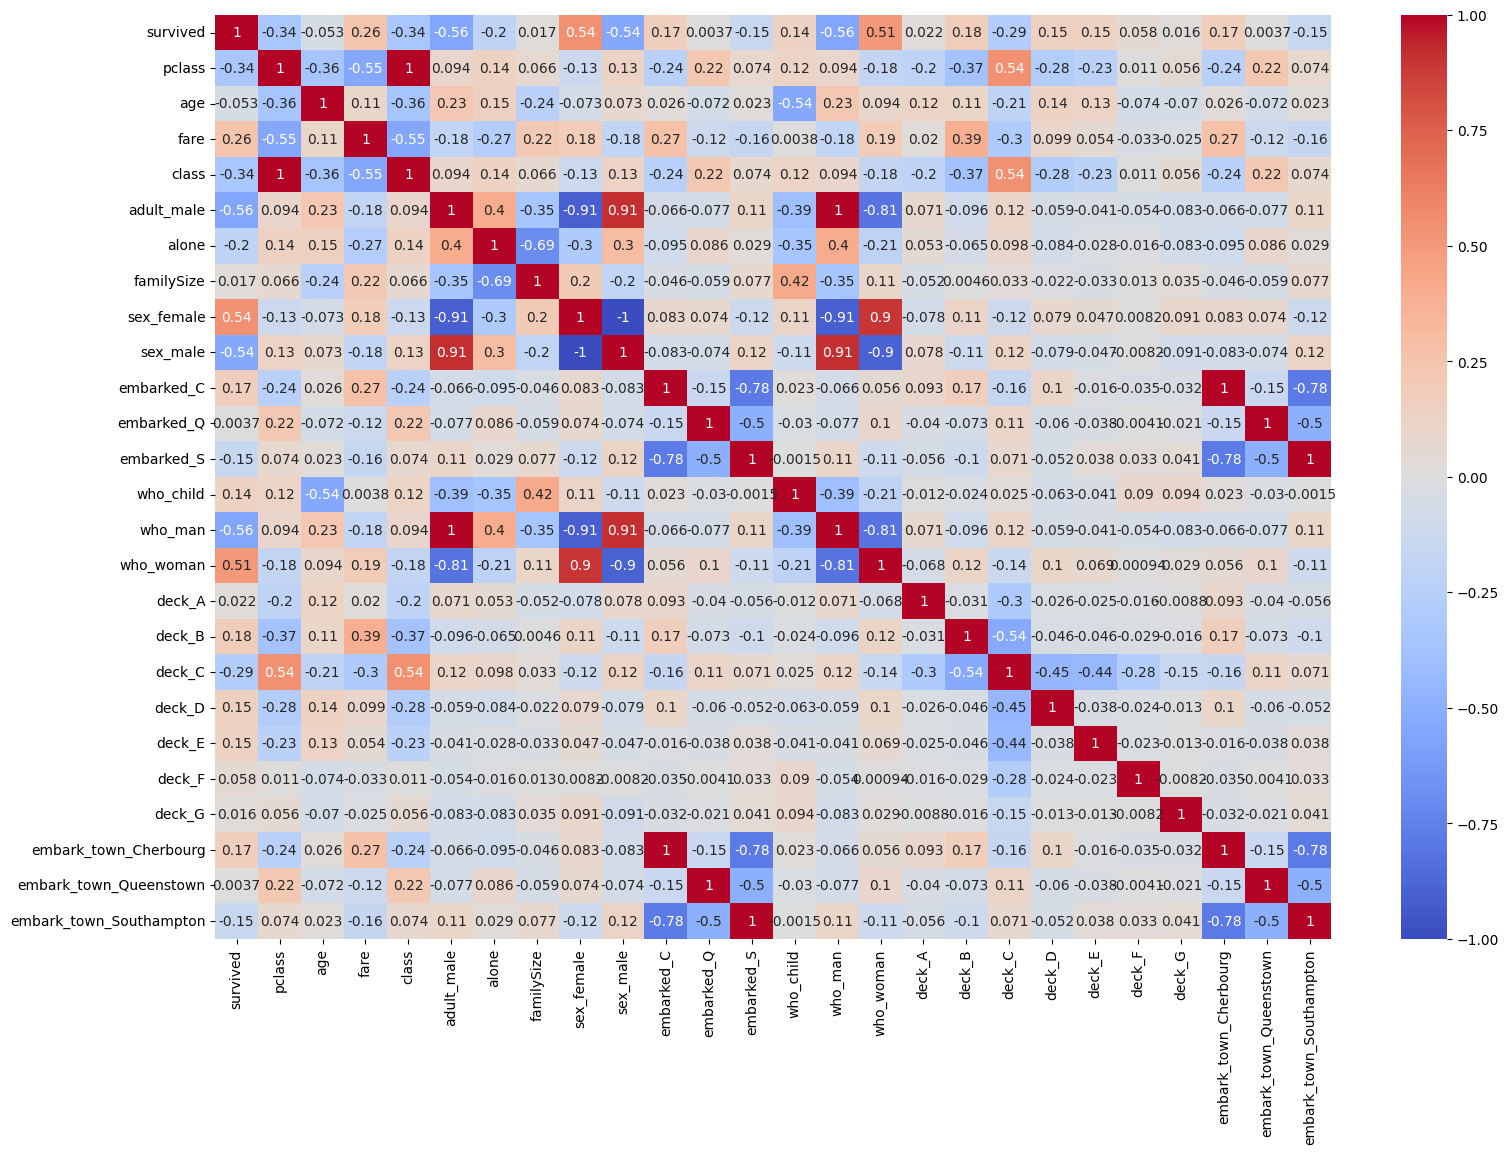

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 12))  # Adjust width and height as needed

# Visualizing the correlation between features
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
corr_matrix = titanic_data.corr().abs()

# Set correlation threshold
threshold = 0.8

# Get column and index names where correlation is strong
col_names = corr_matrix.columns.tolist()
index_names = corr_matrix.index.tolist()

# Find strongly correlated pairs (excluding self-correlations)
strong_pairs = []
for i in range(len(col_names)):
    for j in range(i + 1, len(col_names)):  # Avoid redundant comparisons
        if corr_matrix.iloc[i, j] > threshold:
            strong_pairs.append((col_names[i], col_names[j]))

# Print the strongly correlated pairs
print("Strongly correlated pairs (above threshold", threshold, "):")

for pair in strong_pairs:
    print(pair)

Strongly correlated pairs (above threshold 0.8 ):
('pclass', 'class')
('adult_male', 'sex_female')
('adult_male', 'sex_male')
('adult_male', 'who_man')
('adult_male', 'who_woman')
('sex_female', 'sex_male')
('sex_female', 'who_man')
('sex_female', 'who_woman')
('sex_male', 'who_man')
('sex_male', 'who_woman')
('embarked_C', 'embark_town_Cherbourg')
('embarked_Q', 'embark_town_Queenstown')
('embarked_S', 'embark_town_Southampton')
('who_man', 'who_woman')


In [19]:
titanic_data = titanic_data.drop(columns= list(set([pair[1] for pair in strong_pairs])))

### Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

titanic_data[titanic_data.columns[1:]] = scaler.fit_transform(titanic_data[titanic_data.columns[1:]])

In [21]:
titanic_data.head()

,survived,pclass,age,fare,adult_male,alone,familySize,embarked_C,embarked_Q,embarked_S,who_child,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,1.0,0.271174,0.014151,1.0,0.0,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.472229,0.139136,0.0,0.0,0.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.015469,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.434531,0.103644,0.0,0.0,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.434531,0.015713,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # 20% for validation + test

## 5. Model Building
We will build different models and compare their performance.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Dictionary to store model accuracies
model_accuracies = {}

# Train and evaluate models
for name, model in models.items():
    # Training
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Testing
    y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    # Store accuracies in the dictionary
    model_accuracies[name] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

    print(f'{name}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}')

Logistic Regression: Train Accuracy = 0.8327, Test Accuracy = 0.8222
Decision Tree: Train Accuracy = 0.9825, Test Accuracy = 0.8111
Random Forest: Train Accuracy = 0.9825, Test Accuracy = 0.8333
SVM: Train Accuracy = 0.8340, Test Accuracy = 0.8333
KNN: Train Accuracy = 0.8727, Test Accuracy = 0.7889
Naive Bayes: Train Accuracy = 0.7278, Test Accuracy = 0.8000
XGBoost: Train Accuracy = 0.9638, Test Accuracy = 0.8444


## 6. Model Evaluation and Selection
Here we evaluate the models using accuracy, precision, recall, and F1-score.

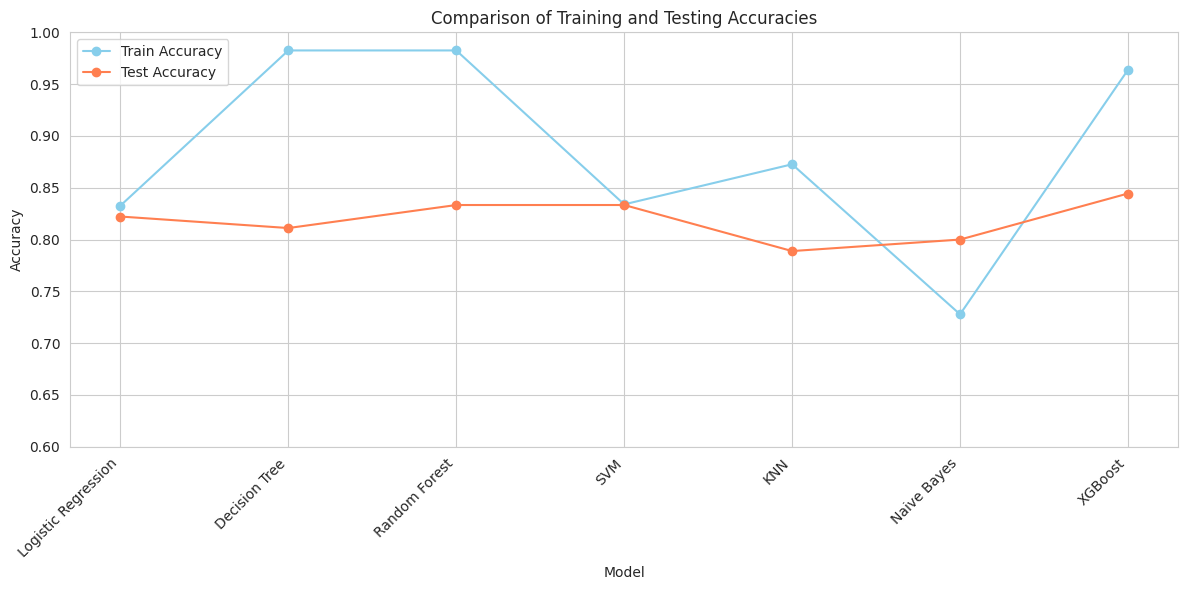

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index')

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(accuracy_df.index, accuracy_df["Train Accuracy"], marker='o', linestyle='-', color="skyblue", label="Train Accuracy")
plt.plot(accuracy_df.index, accuracy_df["Test Accuracy"], marker='o', linestyle='-', color="coral", label="Test Accuracy")

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Training and Testing Accuracies")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.6, 1.0)  # Set y-axis limits

plt.legend()

plt.tight_layout()
plt.show()

## 8. AutoML

In [26]:
!pip install tpot

from tpot import TPOTClassifier

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))

ImportError: cannot import name '_IS_PYPY' from 'sklearn.utils.fixes' (/usr/local/lib/python3.11/dist-packages/sklearn/utils/fixes.py)

In [ ]:
best_pipeline = tpot.fitted_pipeline_

# Predict on test data using the best pipeline
y_pred_test = best_pipeline.predict(X_test)

# Evaluate accuracy and other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print the metrics
print("Final Model Evaluation on Test Data:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")

cross-validation

Ensemble Methods/Models

Address Overfitting

## 7. Conclusion
Summarize the results, draw conclusions about the model performance, and suggest future steps for improving the model.